In [1]:
import csv
import datetime
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

dataframefinal = pd.read_csv('dataframefinal.csv', sep = ',')
print(dataframefinal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    258 non-null    int64  
 1   IRA_Alta                      258 non-null    float64
 2   Influenza                     258 non-null    float64
 3   Neumonia                      258 non-null    float64
 4   Bronquitis_bronquiolitis      258 non-null    float64
 5   Crisis_obstructiva_bronquial  258 non-null    float64
 6   Otra_causa_respiratoria       258 non-null    float64
 7   CAUSAS_SISTEMA_RESPIRATORIO   258 non-null    float64
 8   COVID19_Confirmado_u          258 non-null    float64
 9   COVID19_Confirmado_h          258 non-null    float64
 10  Humedad                       258 non-null    float64
 11  Rocio                         258 non-null    float64
 12  Temperatura                   258 non-null    float64
 13  Tempe

In [2]:
del dataframefinal["Unnamed: 0"]
print('----------------------')
print('Media de cada variable')
print('----------------------')
print(dataframefinal.mean(axis=0))

print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
print(dataframefinal.var(axis=0))

----------------------
Media de cada variable
----------------------
IRA_Alta                        95.639535
Influenza                        7.817829
Neumonia                         8.872093
Bronquitis_bronquiolitis        37.794574
Crisis_obstructiva_bronquial    20.817829
Otra_causa_respiratoria         12.147287
CAUSAS_SISTEMA_RESPIRATORIO     10.000000
COVID19_Confirmado_u             4.996124
COVID19_Confirmado_h             2.720930
Humedad                         66.541860
Rocio                            9.223643
Temperatura                     16.261628
Temperatura_min                 11.262016
Temperatura_max                 24.421705
MP10                            39.913178
MP2.5                           12.916667
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        3032.184734
Influenza                        191.511432
Neumonia                          41.403810
Bronquitis_bronquiolitis        14

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


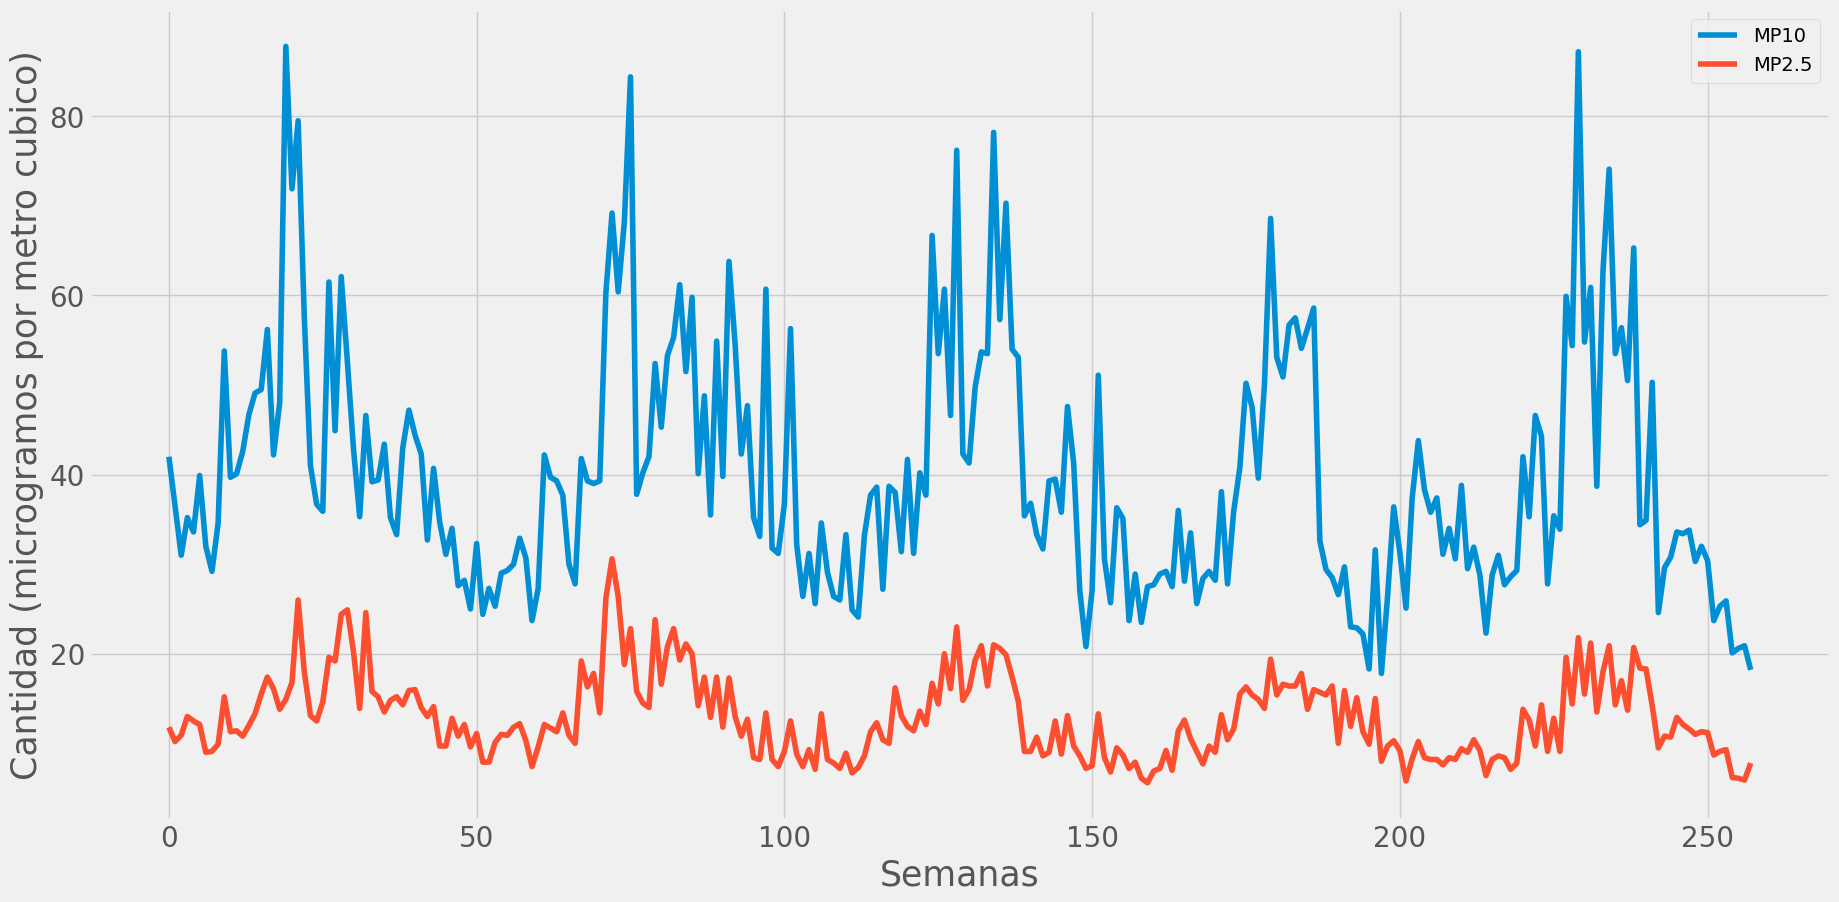

In [3]:
print(plt.style.available)
plt.style.use('fivethirtyeight')
# plot multiple columns such as population and year from dataframe
dataframefinal.plot(x=None, y=["MP10", "MP2.5"], fontsize=20,
        kind="line",figsize=(20, 10)
                   )
#plt.axes().set_facecolor("white")
plt.xlabel("Semanas", fontsize=25)
plt.ylabel("Cantidad (microgramos por metro cubico)", fontsize=25)

# display plot
plt.show()

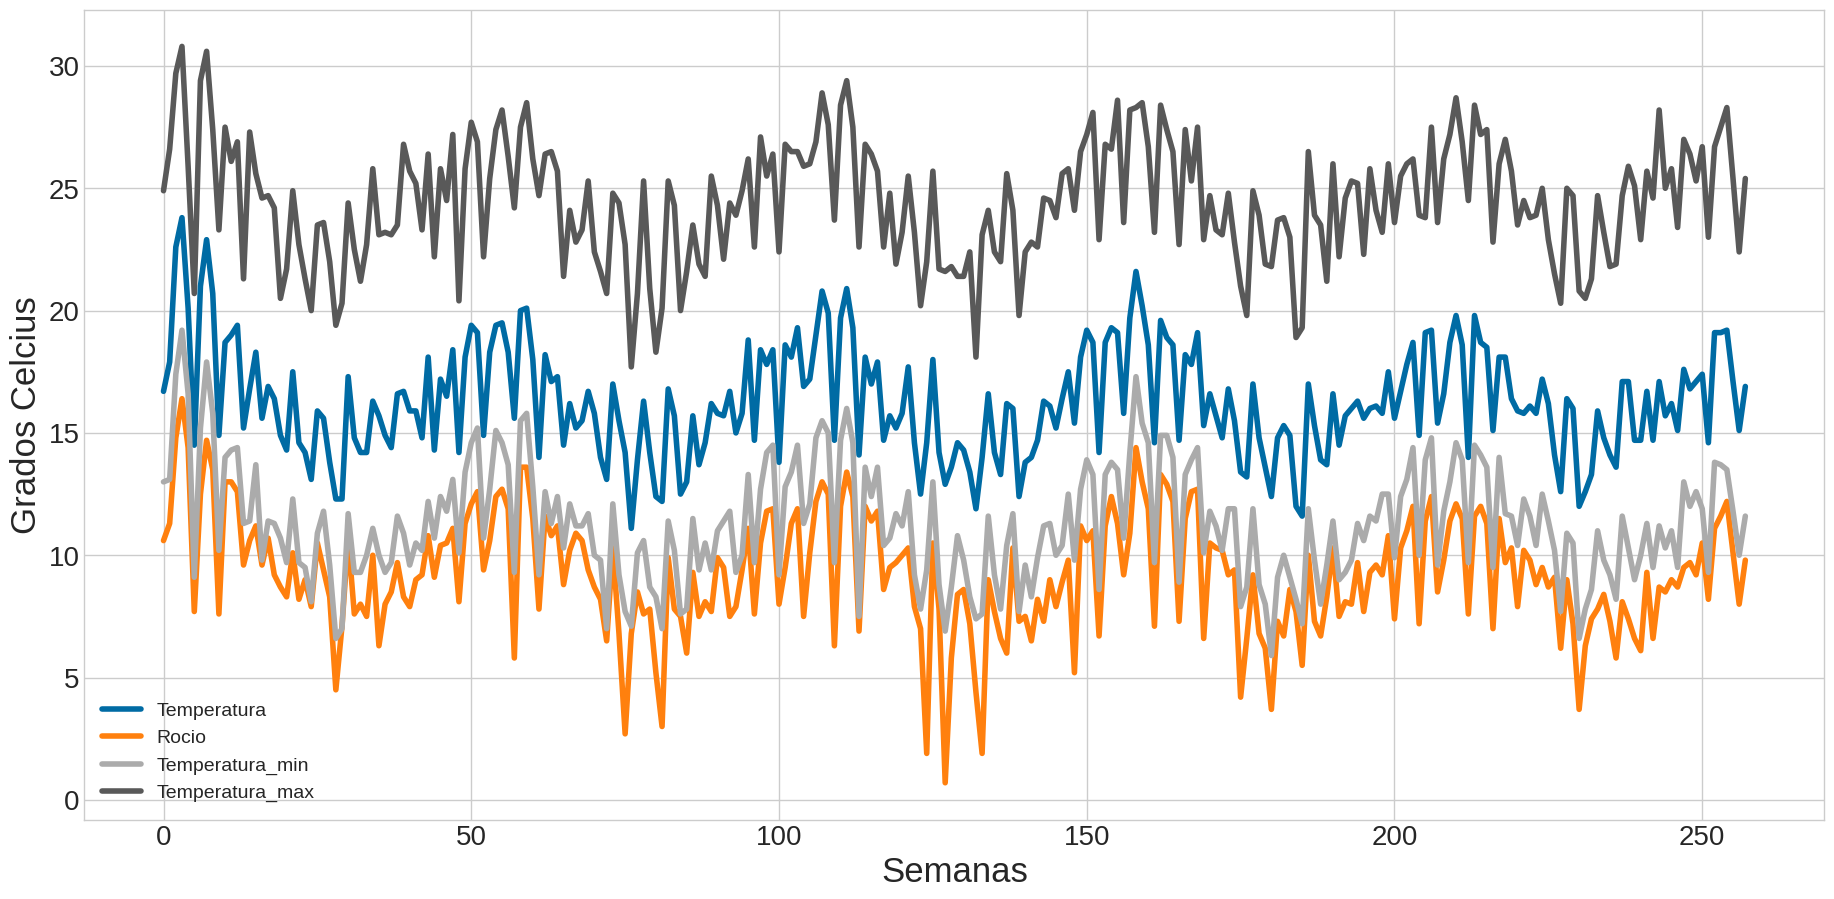

In [35]:
plt.style.use('seaborn-whitegrid')
# plot multiple columns such as population and year from dataframe
dataframefinal.plot(x=None, y=["Temperatura", "Rocio", "Temperatura_min", "Temperatura_max"], fontsize=20,
        kind="line",figsize=(20, 10)
                   )
#plt.axes().set_facecolor("white")
plt.xlabel("Semanas", fontsize=25)
plt.ylabel("Grados Celcius", fontsize=25)

# display plot
plt.show()

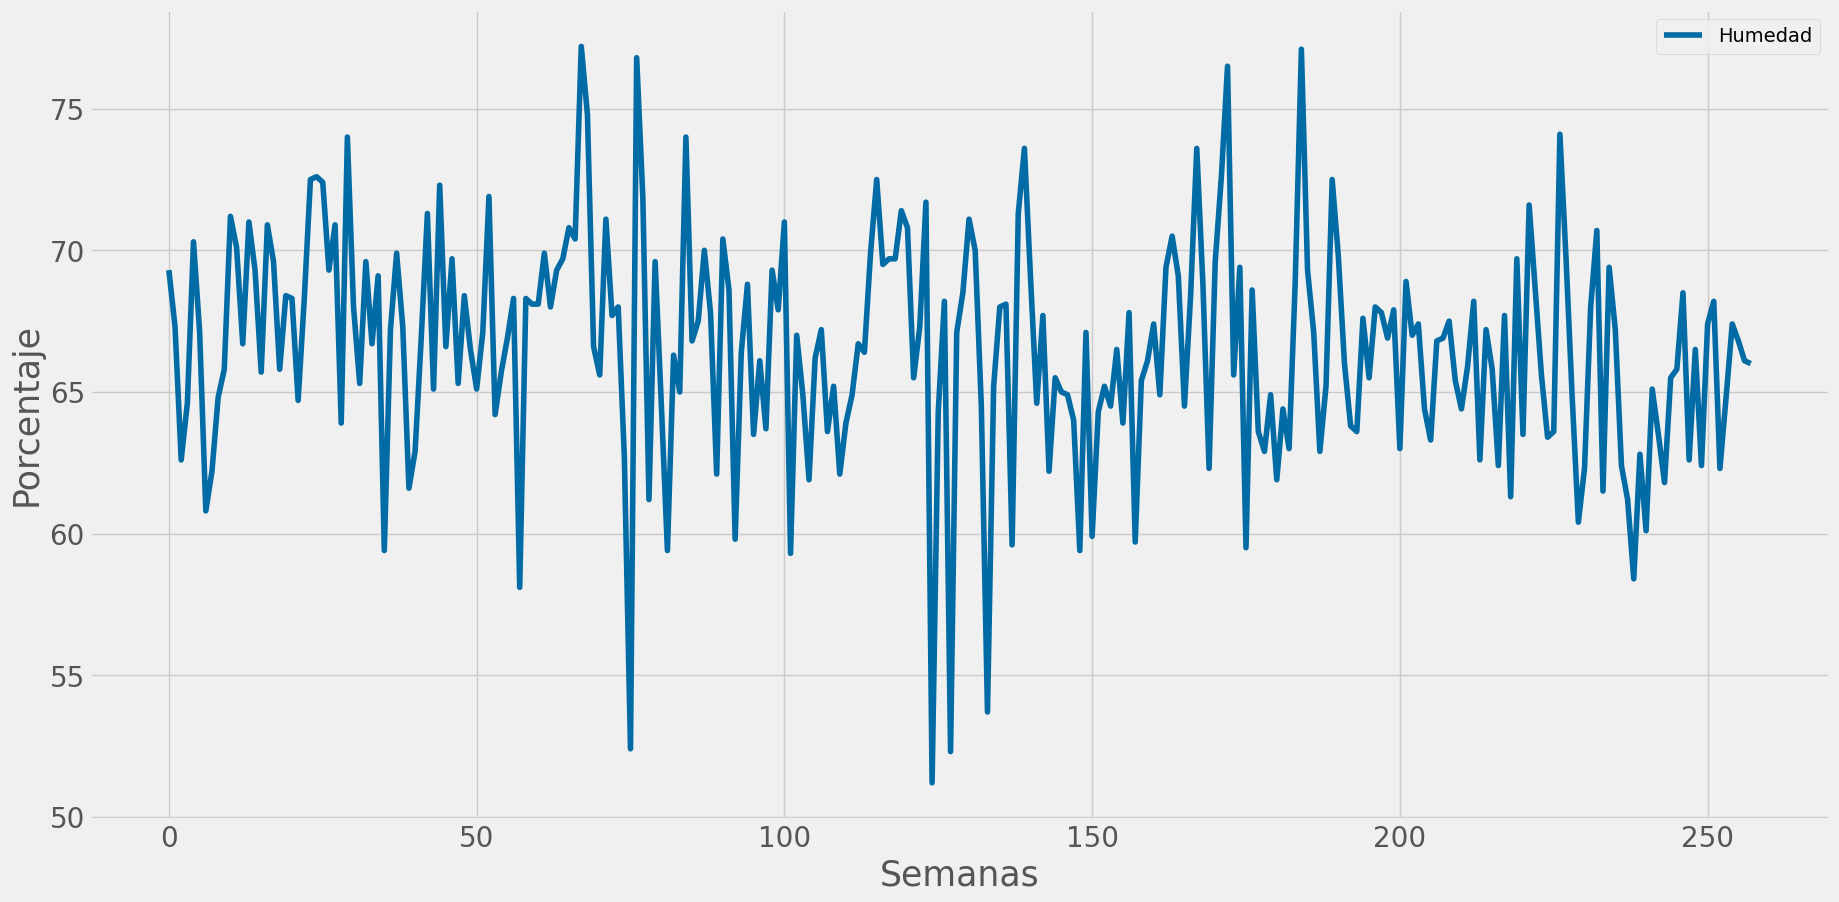

In [34]:
plt.style.use('tableau-colorblind10')
# plot multiple columns such as population and year from dataframe
dataframefinal.plot(x=None, y=["Humedad"], fontsize=20,
        kind="line",figsize=(20, 10)
                   )
#plt.axes().set_facecolor("white")
plt.xlabel("Semanas", fontsize=25)
plt.ylabel("Porcentaje", fontsize=25)  #revisar porcentaje

# display plot
plt.show()

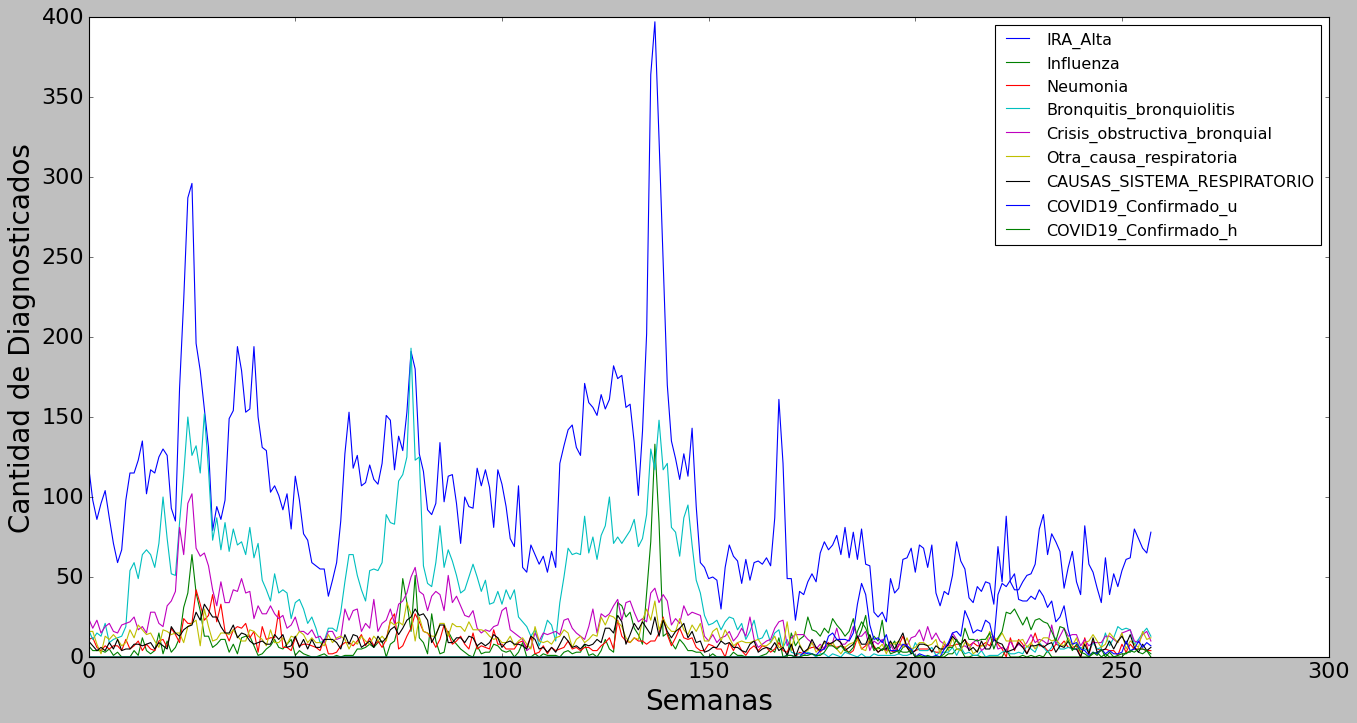

In [11]:
plt.style.use('classic')
# plot multiple columns such as population and year from dataframe
dataframefinal.plot(x=None, y=["IRA_Alta", "Influenza","Neumonia", "Bronquitis_bronquiolitis", "Crisis_obstructiva_bronquial",
                               "Otra_causa_respiratoria", "CAUSAS_SISTEMA_RESPIRATORIO", "COVID19_Confirmado_u",
                               "COVID19_Confirmado_h"], fontsize=20, kind="line",figsize=(20, 10))
#plt.axes().set_facecolor("white")
plt.xlabel("Semanas", fontsize=25)
plt.ylabel("Cantidad de Diagnosticados", fontsize=25)  #revisar porcentaje

# display plot
plt.show()

In [3]:
dataframefinal.describe() 
#Count = cantidad de datos
#Mean = promedio 
#std = desviación estandar
#min = mínimo
#max = máximo

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,95.639535,7.817829,8.872093,37.794574,20.817829,12.147287,10.000000,4.996124,2.720930,66.541860,9.223643,16.261628,11.262016,24.421705,39.913178,12.916667
std,55.065277,13.838766,6.434579,37.689191,14.627733,5.762620,5.991563,10.818811,6.008395,3.992068,2.434948,2.256655,2.367490,2.474994,13.581066,4.612678
min,22.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,51.200000,0.700000,11.100000,5.900000,17.700000,17.800000,5.600000
25%,57.000000,0.250000,5.000000,6.000000,11.000000,9.000000,6.000000,0.000000,0.000000,64.400000,7.600000,14.625000,9.600000,22.700000,29.625000,9.125000
50%,80.500000,3.000000,7.000000,22.500000,16.000000,11.000000,8.000000,0.000000,0.000000,66.850000,9.200000,16.000000,11.200000,24.550000,36.600000,12.100000
75%,122.500000,10.000000,11.000000,64.000000,27.000000,15.750000,13.000000,4.000000,2.000000,69.250000,10.975000,18.000000,12.950000,26.275000,47.675000,15.650000
max,397.000000,133.000000,42.000000,193.000000,102.000000,35.000000,33.000000,52.000000,30.000000,77.200000,16.400000,23.800000,19.200000,30.800000,87.800000,30.600000


In [4]:
#normalizacion del Chichi
Data_norm = (dataframefinal-dataframefinal.min())/(dataframefinal.max()-dataframefinal.min())
Data_norm #Datos normalizados entre [0,1]

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,0.258667,0.052632,0.261905,0.088083,0.212121,0.424242,0.303030,0.000000,0.000000,0.696154,0.630573,0.440945,0.533835,0.549618,0.345714,0.248
1,0.202667,0.030075,0.285714,0.056995,0.151515,0.424242,0.212121,0.000000,0.000000,0.619231,0.675159,0.535433,0.541353,0.679389,0.267143,0.184
2,0.170667,0.030075,0.142857,0.077720,0.202020,0.181818,0.121212,0.000000,0.000000,0.438462,0.898089,0.905512,0.864662,0.916031,0.188571,0.212
3,0.197333,0.030075,0.095238,0.067358,0.121212,0.000000,0.181818,0.000000,0.000000,0.515385,1.000000,1.000000,1.000000,1.000000,0.248571,0.296
4,0.218667,0.022556,0.166667,0.108808,0.161616,0.333333,0.121212,0.000000,0.000000,0.734615,0.872611,0.708661,0.804511,0.625954,0.225714,0.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.154667,0.045113,0.119048,0.041451,0.070707,0.181818,0.181818,0.096154,0.100000,0.523077,0.694268,0.629921,0.586466,0.748092,0.115714,0.148
254,0.138667,0.022556,0.119048,0.056995,0.060606,0.121212,0.090909,0.192308,0.166667,0.623077,0.732484,0.637795,0.571429,0.809160,0.032857,0.024
255,0.122667,0.015038,0.119048,0.077720,0.111111,0.424242,0.242424,0.115385,0.166667,0.600000,0.598726,0.472441,0.443609,0.587786,0.040000,0.020
256,0.114667,0.030075,0.095238,0.093264,0.131313,0.272727,0.121212,0.173077,0.133333,0.573077,0.464968,0.314961,0.308271,0.358779,0.044286,0.012


In [10]:
Data_norm.describe() #Descripción de datos normalizados para verificar rango [0,1]

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.196372,0.058781,0.211240,0.195827,0.179978,0.307494,0.303030,0.096079,0.090698,0.590072,0.542907,0.406427,0.403159,0.513107,0.315903,0.292667
std,0.146841,0.104051,0.153204,0.195281,0.147755,0.174625,0.181563,0.208054,0.200280,0.153541,0.155092,0.177689,0.178007,0.188931,0.194015,0.184507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093333,0.001880,0.119048,0.031088,0.080808,0.212121,0.181818,0.000000,0.000000,0.507692,0.439490,0.277559,0.278195,0.381679,0.168929,0.141000
50%,0.156000,0.022556,0.166667,0.116580,0.131313,0.272727,0.242424,0.000000,0.000000,0.601923,0.541401,0.385827,0.398496,0.522901,0.268571,0.260000
75%,0.268000,0.075188,0.261905,0.331606,0.242424,0.416667,0.393939,0.076923,0.066667,0.694231,0.654459,0.543307,0.530075,0.654580,0.426786,0.402000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#normalizar usando standartscaler para comparar 
normaliza2 = StandardScaler().fit_transform(dataframefinal)

frame = pd.DataFrame(data = normaliza2,
                    index = None,
                    columns = dataframefinal.columns.values)
frame

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,0.425057,-0.059212,0.331341,-0.552811,0.217966,0.669869,0.000000,-0.462697,-0.453735,0.692248,0.566350,0.194635,0.735531,0.193626,0.153955,-0.242557
1,0.042950,-0.276416,0.487054,-0.712317,-0.193011,0.669869,-0.501677,-0.462697,-0.453735,0.190281,0.854389,0.727429,0.777852,0.881832,-0.251807,-0.590101
2,-0.175397,-0.276416,-0.447220,-0.605980,0.149470,-0.721086,-1.003354,-0.462697,-0.453735,-0.989342,2.294585,2.814206,2.597651,2.136794,-0.657570,-0.438051
3,0.006559,-0.276416,-0.758645,-0.659148,-0.398499,-1.764303,-0.668903,-0.462697,-0.453735,-0.487375,2.952960,3.347000,3.359428,2.582104,-0.347715,0.018101
4,0.152123,-0.348817,-0.291508,-0.446473,-0.124514,0.148261,-1.003354,-0.462697,-0.453735,0.943231,2.129991,1.704218,2.259084,0.598453,-0.465755,-0.090506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,-0.284570,-0.131613,-0.602933,-0.792070,-0.740980,-0.721086,-0.668903,0.000359,0.046537,-0.437178,0.977834,1.260223,1.031777,1.246176,-1.033823,-0.785595
254,-0.393743,-0.348817,-0.602933,-0.712317,-0.809476,-1.068825,-1.170580,0.463415,0.380052,0.215379,1.224725,1.304623,0.947136,1.570037,-1.461718,-1.458962
255,-0.502917,-0.421218,-0.602933,-0.605980,-0.466995,0.669869,-0.334451,0.092970,0.380052,0.064789,0.360607,0.372233,0.227680,0.396040,-1.424830,-1.480683
256,-0.557504,-0.276416,-0.758645,-0.526226,-0.330003,-0.199478,-1.003354,0.370804,0.213294,-0.110900,-0.503510,-0.515757,-0.534097,-0.818440,-1.402698,-1.524126


In [9]:
frame.describe()

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,258.000000,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02
mean,8.262125e-17,2.237659e-17,-8.262125e-17,1.101617e-16,8.262125e-17,-5.508083e-17,0.000000,-8.262125e-17,8.262125e-17,1.624885e-15,1.514723e-16,-3.580254e-16,2.754042e-16,2.409786e-16,-3.304850e-16,1.377021e-16
std,1.001944e+00,1.001944e+00,1.001944e+00,1.001944e+00,1.001944e+00,1.001944e+00,1.001944,1.001944e+00,1.001944e+00,1.001944e+00,1.001944e+00,1.001944e+00,1.001944e+00,1.001944e+00,1.001944e+00,1.001944e+00
min,-1.339913e+00,-5.660205e-01,-1.381495e+00,-1.004745e+00,-1.220453e+00,-1.764303e+00,-1.672257,-4.626973e-01,-4.537350e-01,-3.850556e+00,-3.507348e+00,-2.291737e+00,-2.269254e+00,-2.721125e+00,-1.631401e+00,-1.589291e+00
25%,-7.030680e-01,-5.479202e-01,-6.029328e-01,-8.452389e-01,-6.724837e-01,-5.472170e-01,-0.668903,-4.626973e-01,-4.537350e-01,-5.375719e-01,-6.681043e-01,-7.266548e-01,-7.033802e-01,-6.969922e-01,-7.590107e-01,-8.236074e-01
50%,-2.754723e-01,-3.488168e-01,-2.915081e-01,-4.065967e-01,-3.300028e-01,-1.994781e-01,-0.334451,-4.626973e-01,-4.537350e-01,7.733797e-02,-9.728900e-03,-1.161615e-01,-2.624553e-02,5.193706e-02,-2.444299e-01,-1.773924e-01
75%,4.887412e-01,1.579918e-01,3.313415e-01,6.966549e-01,4.234550e-01,6.264018e-01,0.501677,-9.225229e-02,-1.202204e-01,6.796986e-01,7.206563e-01,7.718287e-01,7.143705e-01,7.502630e-01,5.726287e-01,5.937214e-01
max,5.483423e+00,9.063343e+00,5.158425e+00,4.126039e+00,5.560667e+00,3.973389e+00,3.846192,4.353088e+00,4.548984e+00,2.675018e+00,2.952960e+00,3.347000e+00,3.359428e+00,2.582104e+00,3.532852e+00,3.841088e+00


In [4]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(dataframefinal)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
#modelo_pca.components_
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = dataframefinal.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16']
)

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
PC1,0.295913,0.241239,0.249784,0.324379,0.298811,0.244104,0.299846,-0.077497,-0.076839,0.040818,-0.253919,-0.283026,-0.277367,-0.281815,0.239504,0.275634
PC2,-0.214234,-0.087696,-0.135534,-0.235250,-0.223430,-0.165707,-0.151122,0.406861,0.406662,-0.082033,-0.338215,-0.318109,-0.330911,-0.271785,0.131811,0.136084
PC3,0.054857,0.059845,0.225109,0.025038,0.071744,0.109407,0.194186,0.385120,0.389698,-0.366875,0.117437,0.311666,0.242665,0.323082,0.344882,0.243651
PC4,-0.105930,-0.177840,-0.220998,-0.015408,-0.125577,0.197564,-0.027714,-0.317341,-0.309167,-0.711476,-0.329358,0.040527,-0.087947,0.094523,0.150393,0.024714
PC5,0.249673,0.407689,-0.159162,0.088582,-0.012633,0.306523,0.031428,0.226814,0.224348,-0.238868,-0.151960,-0.024379,-0.041754,0.024803,-0.447226,-0.508212
PC6,0.310999,0.465602,-0.544790,-0.010782,-0.097851,-0.007830,-0.400838,-0.037716,-0.048578,0.118431,0.094174,0.058849,0.067880,0.046728,0.368862,0.215136
PC7,0.020768,0.481558,0.259608,-0.146198,0.077114,-0.721826,0.033676,-0.107490,-0.115144,-0.273930,-0.117120,0.028113,-0.062980,0.079180,-0.150472,0.059601
PC8,-0.358651,0.431713,0.068736,-0.304809,-0.508791,0.301636,0.409779,-0.084852,-0.117390,0.148442,0.046326,-0.005051,0.059234,-0.023928,-0.006931,0.142379
PC9,-0.419475,0.106810,-0.467734,-0.136348,0.655807,0.038064,0.217054,0.049207,0.022889,-0.027313,0.041780,0.041052,0.052989,-0.069865,-0.190859,0.213036
PC10,-0.220904,0.193129,0.420729,-0.391016,0.335044,0.325802,-0.530270,-0.051219,-0.047537,0.009404,-0.037525,-0.027021,-0.016472,0.001202,0.191444,-0.200937


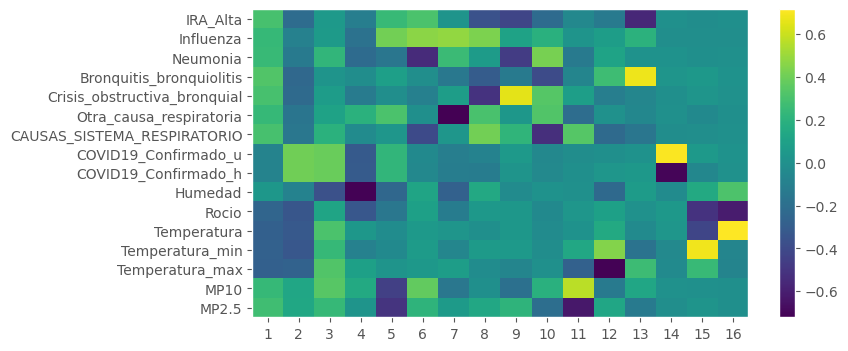

In [5]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
plt.xticks(range(len(dataframefinal.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[3.98902037e-01 2.08998778e-01 8.69282308e-02 8.08942639e-02
 5.61815187e-02 5.27694432e-02 3.74501583e-02 2.37100662e-02
 1.45262747e-02 1.26748901e-02 1.04800640e-02 7.58000007e-03
 5.64303789e-03 1.64783942e-03 1.37742122e-03 2.35976897e-04]


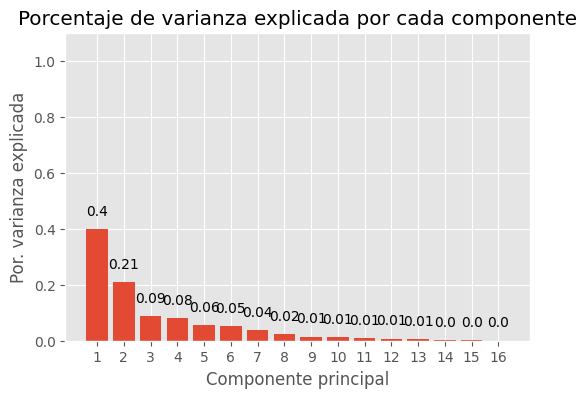

In [4]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.39890204 0.60790081 0.69482905 0.77572331 0.83190483 0.88467427
 0.92212443 0.9458345  0.96036077 0.97303566 0.98351572 0.99109572
 0.99673876 0.9983866  0.99976402 1.        ]


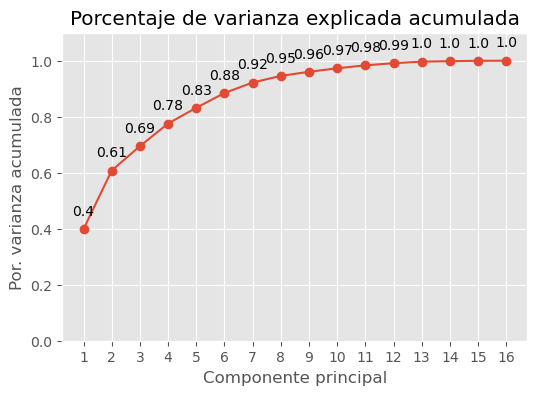

In [6]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(dataframefinal.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [7]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=dataframefinal)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'],
    index   = dataframefinal.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.144890,-1.152185,-0.077321,-0.407509,-0.251539,0.153345,-0.536689,0.328295,-0.171807,0.633100,0.172474,-0.148671,-0.685602,-0.044572,0.228335,-0.071527
1,-1.239519,-1.394774,0.184909,-0.019268,-0.048440,-0.098802,-0.423148,0.309924,-0.459037,0.894130,-0.203052,-0.225166,-0.397551,-0.012369,-0.030457,-0.072920
2,-3.808776,-3.046816,1.736698,0.255606,-0.319904,0.703541,0.595770,-0.524487,0.414456,0.177078,-0.268602,0.513200,-0.276508,0.017208,-0.173414,-0.029877
3,-4.602401,-3.489850,2.192686,-0.360001,-1.156053,1.295842,1.016713,-0.294174,0.247528,-0.752910,-0.047172,0.487969,-0.394714,-0.011653,0.005198,0.024884
4,-2.404345,-2.399158,0.362212,-1.040875,-0.704353,0.903853,-0.713784,0.040267,0.049904,0.310285,-0.275515,0.892972,-0.602110,-0.006127,0.024059,0.008878


In [8]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = dataframefinal.columns,
                    index   = dataframefinal.index
)
print('------------------')
print('Valores reconstruidos')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores originales')
print('---------------------')
display(dataframefinal.head())

------------------
Valores reconstruidos
------------------


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,119.0,7.0,11.0,17.0,24.0,16.0,10.0,7.993606e-15,4.440892e-16,69.3,10.6,16.7,13.0,24.9,42.0,11.8
1,98.0,4.0,12.0,11.0,18.0,16.0,7.0,7.993606e-15,8.881784e-16,67.3,11.3,17.9,13.1,26.6,36.5,10.2
2,86.0,4.0,6.0,15.0,23.0,8.0,4.0,7.993606e-15,3.996803e-15,62.6,14.8,22.6,17.4,29.7,31.0,10.9
3,96.0,4.0,4.0,13.0,15.0,2.0,6.0,1.509903e-14,3.996803e-15,64.6,16.4,23.8,19.2,30.8,35.2,13.0
4,104.0,3.0,7.0,21.0,19.0,13.0,4.0,1.421085e-14,4.440892e-15,70.3,14.4,20.1,16.6,25.9,33.6,12.5


---------------------
Valores originales
---------------------


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,119.0,7.0,11.0,17.0,24.0,16.0,10.0,0.0,0.0,69.3,10.6,16.7,13.0,24.9,42.0,11.8
1,98.0,4.0,12.0,11.0,18.0,16.0,7.0,0.0,0.0,67.3,11.3,17.9,13.1,26.6,36.5,10.2
2,86.0,4.0,6.0,15.0,23.0,8.0,4.0,0.0,0.0,62.6,14.8,22.6,17.4,29.7,31.0,10.9
3,96.0,4.0,4.0,13.0,15.0,2.0,6.0,0.0,0.0,64.6,16.4,23.8,19.2,30.8,35.2,13.0
4,104.0,3.0,7.0,21.0,19.0,13.0,4.0,0.0,0.0,70.3,14.4,20.1,16.6,25.9,33.6,12.5


In [9]:
#Cambiando el numero de componentes a 4 o 6
pca_pipe2 = make_pipeline(StandardScaler(), PCA(n_components=4))
pca_pipe2.fit(dataframefinal)
# Se extrae el modelo entrenado del pipeline
modelo_pca2 = pca_pipe2.named_steps['pca']
#modelo_pca.components_
# Se combierte el array a dataframe para añadir nombres a los ejes.
pcadataframe = pd.DataFrame(
    data    = modelo_pca2.components_,
    columns = dataframefinal.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4'])
#modelo_pca2.components_.index()
pcadataframe

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
PC1,0.295913,0.241239,0.249784,0.324379,0.298811,0.244104,0.299846,-0.077497,-0.076839,0.040818,-0.253919,-0.283026,-0.277367,-0.281815,0.239504,0.275634
PC2,-0.214234,-0.087696,-0.135534,-0.235250,-0.223430,-0.165707,-0.151122,0.406861,0.406662,-0.082033,-0.338215,-0.318109,-0.330911,-0.271785,0.131811,0.136084
PC3,0.054857,0.059845,0.225109,0.025038,0.071744,0.109407,0.194186,0.385120,0.389698,-0.366875,0.117437,0.311666,0.242665,0.323082,0.344882,0.243651
PC4,-0.105930,-0.177840,-0.220998,-0.015408,-0.125577,0.197564,-0.027714,-0.317341,-0.309167,-0.711476,-0.329358,0.040527,-0.087947,0.094523,0.150393,0.024714


Text(0, 0.5, 'Componentes secundarias')

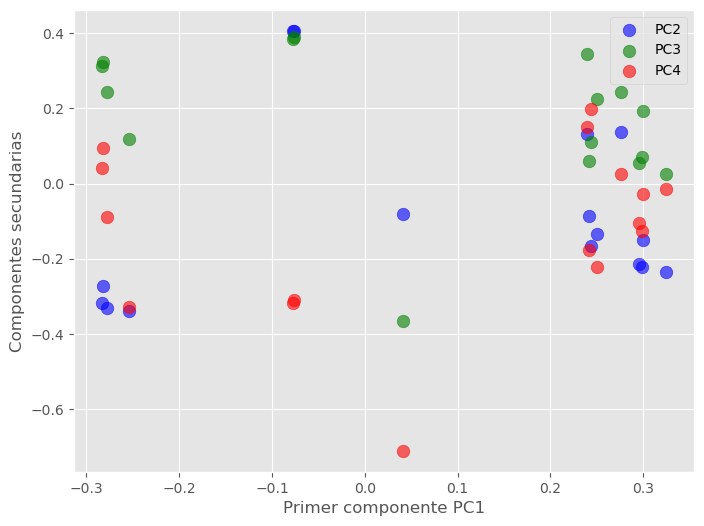

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[1,:], s=9**2, c=["Blue"], alpha=0.6)
plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[2,:], s=9**2, c=["green"], alpha=0.6)
plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[3,:], s=9**2, c=["red"], alpha=0.6)
plt.subplot().legend(['PC2','PC3','PC4'])
plt.xlabel('Primer componente PC1')
plt.ylabel('Componentes secundarias')

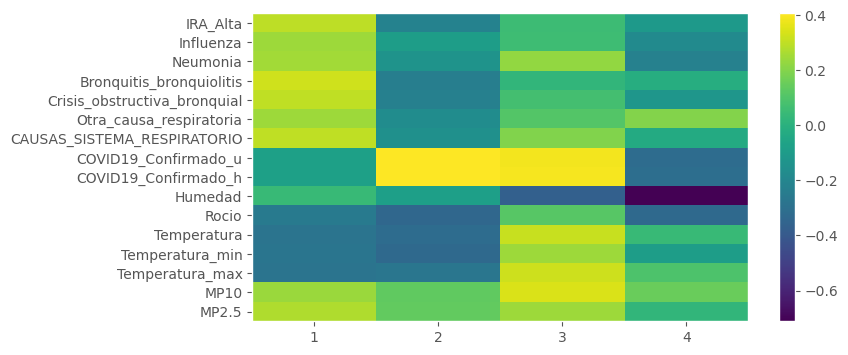

In [11]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes2 = modelo_pca2.components_
plt.imshow(componentes2.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
plt.xticks(range(4), np.arange(modelo_pca2.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [12]:
frameparacortar = dataframefinal.iloc[168:258]
frameparacortar.describe()

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,55.833333,5.200000,6.000000,4.666667,10.511111,8.511111,6.833333,14.322222,7.800000,65.992222,8.798889,15.978889,10.901111,24.374444,37.722222,12.201111
std,17.087514,7.262649,3.016807,4.683224,4.133297,3.730363,3.226471,14.244911,8.011509,3.511785,1.982366,1.896448,1.986725,2.172740,13.928661,4.009049
min,22.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,58.400000,3.700000,11.600000,5.900000,18.900000,17.800000,5.800000
25%,43.000000,0.000000,4.000000,1.000000,8.000000,6.000000,5.000000,3.250000,2.000000,63.325000,7.400000,14.800000,9.525000,23.000000,28.525000,9.025000
50%,54.500000,1.500000,6.000000,3.000000,10.000000,9.000000,6.500000,9.500000,4.500000,65.850000,8.900000,15.950000,11.000000,24.600000,33.700000,11.300000
75%,67.750000,7.750000,7.750000,6.000000,13.000000,11.000000,9.000000,21.750000,11.000000,68.000000,10.200000,17.100000,11.975000,25.975000,47.275000,15.400000
max,121.000000,26.000000,15.000000,19.000000,23.000000,22.000000,15.000000,52.000000,30.000000,77.100000,12.700000,19.800000,14.800000,28.700000,87.200000,21.800000


In [13]:
#A partir de aqui implemento apriori
from mlxtend.frequent_patterns import apriori, association_rules 
dataframefinal

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,119.0,7.0,11.0,17.0,24.0,16.0,10.0,0.0,0.0,69.3,10.6,16.7,13.0,24.9,42.0,11.8
1,98.0,4.0,12.0,11.0,18.0,16.0,7.0,0.0,0.0,67.3,11.3,17.9,13.1,26.6,36.5,10.2
2,86.0,4.0,6.0,15.0,23.0,8.0,4.0,0.0,0.0,62.6,14.8,22.6,17.4,29.7,31.0,10.9
3,96.0,4.0,4.0,13.0,15.0,2.0,6.0,0.0,0.0,64.6,16.4,23.8,19.2,30.8,35.2,13.0
4,104.0,3.0,7.0,21.0,19.0,13.0,4.0,0.0,0.0,70.3,14.4,20.1,16.6,25.9,33.6,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,80.0,6.0,5.0,8.0,10.0,8.0,6.0,5.0,3.0,64.8,11.6,19.1,13.7,27.5,25.9,9.3
254,74.0,3.0,5.0,11.0,9.0,6.0,3.0,10.0,5.0,67.4,12.2,19.2,13.5,28.3,20.1,6.2
255,68.0,2.0,5.0,15.0,14.0,16.0,8.0,6.0,5.0,66.8,10.1,17.1,11.8,25.4,20.6,6.1
256,65.0,4.0,4.0,18.0,16.0,11.0,4.0,9.0,4.0,66.1,8.0,15.1,10.0,22.4,20.9,5.9


In [11]:
dfcategorico = dataframefinal
"""
dfcategorico['IRA_Alta'] = pd.cut(x=dataframefinal['IRA_Alta'], bins=[21, 57, 80, 400],
                                 labels=['IRA_Alta_Bajo', 'IRA_Alta_Medio', ' IRA_Alta_Alto'])
dfcategorico['Influenza'] = pd.cut(x=dataframefinal['Influenza'], bins=[-1, 0.25, 3, 134],
                                 labels=['Influenza_Bajo', 'Influenza_Medio', 'Influenza_Alto'])
dfcategorico['Neumonia'] = pd.cut(x=dataframefinal['Neumonia'], bins=[-1, 5, 7, 43],
                                 labels=['Neumonia_Bajo', 'Neumonia_Medio', 'Neumonia_Alto'])
dfcategorico['Bronquitis_bronquiolitis'] = pd.cut(x=dataframefinal['Bronquitis_bronquiolitis'], bins=[-1, 6, 22.5, 194],
                                 labels=['Bronquitis_bronquiolitis_Bajo', 'Bronquitis_bronquiolitis_Medio', 'Bronquitis_bronquiolitis_Alto'])
dfcategorico['Crisis_obstructiva_bronquial'] = pd.cut(x=dataframefinal['Crisis_obstructiva_bronquial'], bins=[3, 11, 16, 103],
                                 labels=['Crisis_obstructiva_bronquial_Bajo', 'Crisis_obstructiva_bronquial_Medio', 'Crisis_obstructiva_bronquial_Alto'])
dfcategorico['Otra_causa_respiratoria'] = pd.cut(x=dataframefinal['Otra_causa_respiratoria'], bins=[2, 9, 11, 36],
                                 labels=['Otra_causa_respiratoria_Bajo', 'Otra_causa_respiratoria_Medio', 'Otra_causa_respiratoria_Alto'])
dfcategorico['CAUSAS_SISTEMA_RESPIRATORIO'] = pd.cut(x=dataframefinal['CAUSAS_SISTEMA_RESPIRATORIO'], bins=[-1, 6, 8, 33],
                                 labels=['CAUSAS_SISTEMA_RESPIRATORIO_Bajo', 'CAUSAS_SISTEMA_RESPIRATORIO_Medio', 'CAUSAS_SISTEMA_RESPIRATORIO_Alto'])
dfcategorico['COVID19_Confirmado_u'] = pd.cut(x=dataframefinal['COVID19_Confirmado_u'], bins=[-1, 3.25, 9.5, 53],
                                 labels=['COVID19_Confirmado_u_Bajo', 'COVID19_Confirmado_u_Medio', 'COVID19_Confirmado_u_Alto'])
dfcategorico['COVID19_Confirmado_h'] = pd.cut(x=dataframefinal['COVID19_Confirmado_h'], bins=[-1, 2, 4.5, 31],
                                 labels=['COVID19_Confirmado_h_Bajo', 'COVID19_Confirmado_h_Medio', 'COVID19_Confirmado_h_Alto'])
dfcategorico['Humedad'] = pd.cut(x=dataframefinal['Humedad'], bins=[51, 64.4, 66.85, 73],
                                 labels=['Humedad_Bajo', 'Humedad_Medio', 'Humedad_Alto'])
dfcategorico['Rocio'] = pd.cut(x=dataframefinal['Rocio'], bins=[-1, 7.6, 9.2, 17],
                                 labels=['Rocio_Bajo', 'Rocio_Medio', 'Rocio_Alto'])
dfcategorico['Temperatura'] = pd.cut(x=dataframefinal['Temperatura'], bins=[11, 14.62, 16, 24],
                                 labels=['Temperatura_Bajo', 'Temperatura_Medio', 'Temperatura_Alto'])
dfcategorico['Temperatura_min'] = pd.cut(x=dataframefinal['Temperatura_min'], bins=[5, 9.6, 11.2, 20],
                                 labels=['Temperatura_min_Bajo', 'Temperatura_min_Medio', 'Temperatura_min_Alto'])
dfcategorico['Temperatura_max'] = pd.cut(x=dataframefinal['Temperatura_max'], bins=[17, 22.7, 24.55, 31],
                                 labels=['Temperatura_max_Bajo', 'Temperatura_max_Medio', 'Temperatura_max_Alto'])
dfcategorico['MP10'] = pd.cut(x=dataframefinal['MP10'], bins=[17, 29.62, 36.6, 88],
                                 labels=['MP10_Bajo', 'MP10_Medio', 'MP10_Alto'])
dfcategorico['MP2.5'] = pd.cut(x=dataframefinal['MP2.5'], bins=[5, 9.12, 12.1, 31],
                                 labels=['MP2.5_Bajo', 'MP2.5_Medio', 'MP2.5_Alto'])
"""
dfcategorico



,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,IRA_Alta_Alto,Influenza_Alto,Neumonia_Alto,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Alto,Otra_causa_respiratoria_Alto,CAUSAS_SISTEMA_RESPIRATORIO_Alto,COVID19_Confirmado_u_Bajo,COVID19_Confirmado_h_Bajo,Humedad_Alto,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Alto,MP2.5_Medio
1,IRA_Alta_Alto,Influenza_Alto,Neumonia_Alto,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Alto,Otra_causa_respiratoria_Alto,CAUSAS_SISTEMA_RESPIRATORIO_Medio,COVID19_Confirmado_u_Bajo,COVID19_Confirmado_h_Bajo,Humedad_Alto,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Medio,MP2.5_Medio
2,IRA_Alta_Alto,Influenza_Alto,Neumonia_Medio,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Alto,Otra_causa_respiratoria_Bajo,CAUSAS_SISTEMA_RESPIRATORIO_Bajo,COVID19_Confirmado_u_Bajo,COVID19_Confirmado_h_Bajo,Humedad_Bajo,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Medio,MP2.5_Medio
3,IRA_Alta_Alto,Influenza_Alto,Neumonia_Bajo,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Medio,NaN,CAUSAS_SISTEMA_RESPIRATORIO_Bajo,COVID19_Confirmado_u_Bajo,COVID19_Confirmado_h_Bajo,Humedad_Medio,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Medio,MP2.5_Alto
4,IRA_Alta_Alto,Influenza_Medio,Neumonia_Medio,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Alto,Otra_causa_respiratoria_Alto,CAUSAS_SISTEMA_RESPIRATORIO_Bajo,COVID19_Confirmado_u_Bajo,COVID19_Confirmado_h_Bajo,Humedad_Alto,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Medio,MP2.5_Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,IRA_Alta_Medio,Influenza_Alto,Neumonia_Bajo,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Bajo,Otra_causa_respiratoria_Bajo,CAUSAS_SISTEMA_RESPIRATORIO_Bajo,COVID19_Confirmado_u_Medio,COVID19_Confirmado_h_Medio,Humedad_Medio,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Bajo,MP2.5_Medio
254,IRA_Alta_Medio,Influenza_Medio,Neumonia_Bajo,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Bajo,Otra_causa_respiratoria_Bajo,CAUSAS_SISTEMA_RESPIRATORIO_Bajo,COVID19_Confirmado_u_Alto,COVID19_Confirmado_h_Alto,Humedad_Alto,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Bajo,MP2.5_Bajo
255,IRA_Alta_Medio,Influenza_Medio,Neumonia_Bajo,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Medio,Otra_causa_respiratoria_Alto,CAUSAS_SISTEMA_RESPIRATORIO_Medio,COVID19_Confirmado_u_Medio,COVID19_Confirmado_h_Alto,Humedad_Medio,Rocio_Alto,Temperatura_Alto,Temperatura_min_Alto,Temperatura_max_Alto,MP10_Bajo,MP2.5_Bajo
256,IRA_Alta_Medio,Influenza_Alto,Neumonia_Bajo,Bronquitis_bronquiolitis_Medio,Crisis_obstructiva_bronquial_Medio,Otra_causa_respiratoria_Medio,CAUSAS_SISTEMA_RESPIRATORIO_Bajo,COVID19_Confirmado_u_Medio,COVID19_Confirmado_h_Medio,Humedad_Medio,Rocio_Medio,Temperatura_Medio,Temperatura_min_Medio,Temperatura_max_Bajo,MP10_Bajo,MP2.5_Bajo


In [14]:
dfapriori = pd.DataFrame(
    data=0,
    index=np.arange(dataframefinal.shape[0]),
    columns = ['IRA_Alta_Bajo', 'IRA_Alta_Medio', 'IRA_Alta_Alto', 'Influenza_Bajo', 'Influenza_Medio', 'Influenza_Alto','Neumonia_Bajo', 'Neumonia_Medio', 'Neumonia_Alto','Bronquitis_bronquiolitis_Bajo', 'Bronquitis_bronquiolitis_Medio', 'Bronquitis_bronquiolitis_Alto','Crisis_obstructiva_bronquial_Bajo', 'Crisis_obstructiva_bronquial_Medio', 'Crisis_obstructiva_bronquial_Alto','Otra_causa_respiratoria_Bajo', 'Otra_causa_respiratoria_Medio', 'Otra_causa_respiratoria_Alto','CAUSAS_SISTEMA_RESPIRATORIO_Bajo', 'CAUSAS_SISTEMA_RESPIRATORIO_Medio', 'CAUSAS_SISTEMA_RESPIRATORIO_Alto','COVID19_Confirmado_u_Bajo', 'COVID19_Confirmado_u_Medio', 'COVID19_Confirmado_u_Alto','COVID19_Confirmado_h_Bajo', 'COVID19_Confirmado_h_Medio', 'COVID19_Confirmado_h_Alto','Humedad_Bajo', 'Humedad_Medio', 'Humedad_Alto','Rocio_Bajo', 'Rocio_Medio', 'Rocio_Alto','Temperatura_Bajo', 'Temperatura_Medio', 'Temperatura_Alto','Temperatura_min_Bajo', 'Temperatura_min_Medio', 'Temperatura_min_Alto','Temperatura_max_Bajo', 'Temperatura_max_Medio', 'Temperatura_max_Alto','MP10_Bajo', 'MP10_Medio', 'MP10_Alto','MP2.5_Alerta', 'MP2.5_Preemergencia', 'MP2.5_Emergencia'])
#dfapriori
#dataframefinal.IRA_Alta[0]

for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.IRA_Alta[i] <= 57):
        dfapriori.IRA_Alta_Bajo[i] = 1
    elif(dataframefinal.IRA_Alta[i] > 57 and dataframefinal.IRA_Alta[i] <= 80):
        dfapriori.IRA_Alta_Medio[i] = 1
    else:
        dfapriori.IRA_Alta_Alto[i] = 1

for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Influenza[i] <= 0.25):
        dfapriori.Influenza_Bajo[i] = 1
    elif(dataframefinal.Influenza[i] > 0.25 and dataframefinal.Influenza[i] <= 3):
        dfapriori.Influenza_Medio[i] = 1
    else:
        dfapriori.Influenza_Alto[i] = 1
        
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Neumonia[i] <= 5):
        dfapriori.Neumonia_Bajo[i] = 1
    elif(dataframefinal.Neumonia[i] > 5 and dataframefinal.Neumonia[i] <= 7):
        dfapriori.Neumonia_Medio[i] = 1
    else:
        dfapriori.Neumonia_Alto[i] = 1

for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Bronquitis_bronquiolitis[i] <= 6):
        dfapriori.Bronquitis_bronquiolitis_Bajo[i] = 1
    elif(dataframefinal.Bronquitis_bronquiolitis[i] > 6 and dataframefinal.Bronquitis_bronquiolitis[i] <= 22.5):
        dfapriori.Bronquitis_bronquiolitis_Medio[i] = 1
    else:
        dfapriori.Bronquitis_bronquiolitis_Alto[i] = 1
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Crisis_obstructiva_bronquial[i] <= 11):
        dfapriori.Crisis_obstructiva_bronquial_Bajo[i] = 1
    elif(dataframefinal.Crisis_obstructiva_bronquial[i] > 11 and dataframefinal.Crisis_obstructiva_bronquial[i] <= 16):
        dfapriori.Crisis_obstructiva_bronquial_Medio[i] = 1
    else:
        dfapriori.Crisis_obstructiva_bronquial_Alto[i] = 1

for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Otra_causa_respiratoria[i] <= 9):
        dfapriori.Otra_causa_respiratoria_Bajo[i] = 1
    elif(dataframefinal.Otra_causa_respiratoria[i] > 9 and dataframefinal.Otra_causa_respiratoria[i] <= 11):
        dfapriori.Otra_causa_respiratoria_Medio[i] = 1
    else:
        dfapriori.Otra_causa_respiratoria_Alto[i] = 1

for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.CAUSAS_SISTEMA_RESPIRATORIO[i] <= 6):
        dfapriori.CAUSAS_SISTEMA_RESPIRATORIO_Bajo[i] = 1
    elif(dataframefinal.CAUSAS_SISTEMA_RESPIRATORIO[i] > 6 and dataframefinal.CAUSAS_SISTEMA_RESPIRATORIO[i] <= 8):
        dfapriori.CAUSAS_SISTEMA_RESPIRATORIO_Medio[i] = 1
    else:
        dfapriori.CAUSAS_SISTEMA_RESPIRATORIO_Alto[i] = 1
#En los 2 casos de covid solo considero los ultimos años, por eso el for comienza al principio del 4to año        
for i in range(169,dataframefinal.shape[0]):
    if(dataframefinal.COVID19_Confirmado_u[i] <= 3.25):
        dfapriori.COVID19_Confirmado_u_Bajo[i] = 1
    elif(dataframefinal.COVID19_Confirmado_u[i] > 3.25 and dataframefinal.COVID19_Confirmado_u[i] <= 9.5):
        dfapriori.COVID19_Confirmado_u_Medio[i] = 1
    else:
        dfapriori.COVID19_Confirmado_u_Alto[i] = 1
        
for i in range(169,dataframefinal.shape[0]):
    if(dataframefinal.COVID19_Confirmado_h[i] <= 2):
        dfapriori.COVID19_Confirmado_h_Bajo[i] = 1
    elif(dataframefinal.COVID19_Confirmado_h[i] > 2 and dataframefinal.COVID19_Confirmado_h[i] <= 4.5):
        dfapriori.COVID19_Confirmado_h_Medio[i] = 1
    else:
        dfapriori.COVID19_Confirmado_h_Alto[i] = 1
        
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Humedad[i] <= 64.4):
        dfapriori.Humedad_Bajo[i] = 1
    elif(dataframefinal.Humedad[i] > 64.4 and dataframefinal.Humedad[i] <= 66.85):
        dfapriori.Humedad_Medio[i] = 1
    else:
        dfapriori.Humedad_Alto[i] = 1
        
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Temperatura[i] <= 14.62):
        dfapriori.Temperatura_Bajo[i] = 1
    elif(dataframefinal.Temperatura[i] > 14.62 and dataframefinal.Temperatura[i] <= 16):
        dfapriori.Temperatura_Medio[i] = 1
    else:
        dfapriori.Temperatura_Alto[i] = 1

for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Temperatura_min[i] <= 9.6):
        dfapriori.Temperatura_min_Bajo[i] = 1
    elif(dataframefinal.Temperatura_min[i] > 9.6 and dataframefinal.Temperatura_min[i] <= 11.2):
        dfapriori.Temperatura_min_Medio[i] = 1
    else:
        dfapriori.Temperatura_min_Alto[i] = 1
        
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.Temperatura_max[i] <= 22.7):
        dfapriori.Temperatura_max_Bajo[i] = 1
    elif(dataframefinal.Temperatura_max[i] > 22.7 and dataframefinal.Temperatura_max[i] <= 24.65):
        dfapriori.Temperatura_max_Medio[i] = 1
    else:
        dfapriori.Temperatura_max_Alto[i] = 1
        
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal.MP10[i] <= 29.62):
        dfapriori.MP10_Bajo[i] = 1
    elif(dataframefinal.MP10[i] > 29.62 and dataframefinal.MP10[i] <= 36.6):
        dfapriori.MP10_Medio[i] = 1
    else:
        dfapriori.MP10_Alto[i] = 1
        
for i in range(0,dataframefinal.shape[0]):
    if(dataframefinal['MP2.5'][i] <= 110):
        dfapriori['MP2.5_Alerta'][i] = 1
    elif(dataframefinal['MP2.5'][i] > 110 and dataframefinal['MP2.5'][i] <= 160):
        dfapriori['MP2.5_Preemergencia'][i] = 1
    else:
        dfapriori['MP2.5_Emergencia'][i] = 1
        
dfapriori.tail(40)



,IRA_Alta_Bajo,IRA_Alta_Medio,IRA_Alta_Alto,Influenza_Bajo,Influenza_Medio,Influenza_Alto,Neumonia_Bajo,Neumonia_Medio,Neumonia_Alto,Bronquitis_bronquiolitis_Bajo,...,Temperatura_min_Alto,Temperatura_max_Bajo,Temperatura_max_Medio,Temperatura_max_Alto,MP10_Bajo,MP10_Medio,MP10_Alto,MP2.5_Alerta,MP2.5_Preemergencia,MP2.5_Emergencia
218,1,0,0,1,0,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
219,1,0,0,1,0,0,0,0,1,1,...,1,0,0,1,1,0,0,1,0,0
220,0,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,1,1,0,0
221,1,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
222,0,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,0,1,1,0,0
223,1,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,1,1,0,0
224,1,0,0,1,0,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0
225,1,0,0,1,0,0,0,0,1,1,...,1,0,1,0,0,1,0,1,0,0
226,1,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
227,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [18]:
frq_items = apriori(dfapriori, min_support=0.4, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 2)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

C:\Users\maste\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Temperatura_max_Alto, Temperatura_min_Alto)",(Temperatura_Alto),0.406977,0.492248,0.403101,0.990476,2.012148,0.202767,53.313953
2,"(MP2.5_Alerta, Temperatura_max_Alto, Temperatu...",(Temperatura_Alto),0.406977,0.492248,0.403101,0.990476,2.012148,0.202767,53.313953
3,"(Temperatura_max_Alto, Temperatura_min_Alto)","(MP2.5_Alerta, Temperatura_Alto)",0.406977,0.492248,0.403101,0.990476,2.012148,0.202767,53.313953
1,(Temperatura_Alto),"(Temperatura_max_Alto, Temperatura_min_Alto)",0.492248,0.406977,0.403101,0.818898,2.012148,0.202767,3.274520
4,"(MP2.5_Alerta, Temperatura_Alto)","(Temperatura_max_Alto, Temperatura_min_Alto)",0.492248,0.406977,0.403101,0.818898,2.012148,0.202767,3.274520
5,(Temperatura_Alto),"(MP2.5_Alerta, Temperatura_max_Alto, Temperatu...",0.492248,0.406977,0.403101,0.818898,2.012148,0.202767,3.274520


In [15]:
dfcategorico.shape
records = []
for i in range(0,258):
    records.append([dfcategorico.values[i,j] for j in range(0,16)])
    
records
reglas_asociacion = apriori(dfcategorico, min_support = 0.5)
reglas_asociacion_resultado = list(reglas_asociacion)
reglas_asociacion_resultado

/home/carlo/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value  IRA_Alta_Alto

In [14]:
from sklearn.cluster import KMeans #contiene algoritmo kmeans

In [15]:
clustering =KMeans(n_clusters = 2, max_iter = 300) #Crea el modelo mediante funcion KMeans y nuestro numero de clusters definidos
clustering.fit(Data_norm) #Aplicando el modelo a nuestra data

kmeans = KMeans(n_clusters=2).fit(Data_norm)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.51161905e-01  1.33297530e-01  3.57823129e-01  4.47076240e-01
   3.50505051e-01  4.80086580e-01  5.14718615e-01  1.66533454e-16
  -6.93889390e-17  5.87032967e-01  4.37761601e-01  2.83689539e-01
   2.80773362e-01  3.76335878e-01  4.69183673e-01  4.56857143e-01]
 [ 1.38737589e-01  3.10350344e-02  1.56661601e-01  1.02276486e-01
   1.16483989e-01  2.43230174e-01  2.24210187e-01  1.31853519e-01
   1.24468085e-01  5.91202946e-01  5.82057189e-01  4.52127660e-01
   4.48728203e-01  5.64032808e-01  2.58829787e-01  2.31531915e-01]]


In [18]:
dataframefinal['Cluster']=clustering.labels_ #Se agrega una columna indicando a que cluster pertenece el conjunto de datos
dataframefinal.head() #Confirmar visualmente los primeros 5 conjuntos

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5,Cluster
0,119.0,7.0,11.0,17.0,24.0,16.0,10.0,0.0,0.0,69.3,10.6,16.7,13.0,24.9,42.0,11.8,1
1,98.0,4.0,12.0,11.0,18.0,16.0,7.0,0.0,0.0,67.3,11.3,17.9,13.1,26.6,36.5,10.2,1
2,86.0,4.0,6.0,15.0,23.0,8.0,4.0,0.0,0.0,62.6,14.8,22.6,17.4,29.7,31.0,10.9,1
3,96.0,4.0,4.0,13.0,15.0,2.0,6.0,0.0,0.0,64.6,16.4,23.8,19.2,30.8,35.2,13.0,1
4,104.0,3.0,7.0,21.0,19.0,13.0,4.0,0.0,0.0,70.3,14.4,20.1,16.6,25.9,33.6,12.5,1


In [19]:
pca = PCA(n_components=2) #Numero de componentes 2, para graficar en 2 dimensiones
pca_Data = pca.fit_transform(Data_norm) #Obtener las 2 componentes, utilizando fit.transform
pca_Data_df = pd.DataFrame(data = pca_Data, columns= ['Componente1', 'Componente2']) #Se crea un DataFrame con los 2 componentes nuevos
pca_Data_final = pd.concat([pca_Data_df, dataframefinal[['Cluster']]], axis = 1) #Le agrego la columna indicando axis=1 'KMeans_Cluster' del archivo original y lo concateno para poder graficar los nuevos componentes y el cluster al que pertenecen
pca_Data_final #Visualizar nuevo archivo a graficar

,Componente1,Componente2,Cluster
0,-0.044174,-0.189117,1
1,-0.237311,-0.235027,1
2,-0.700573,-0.473710,1
3,-0.828758,-0.527770,1
4,-0.430048,-0.364732,1
...,...,...,...
253,-0.520513,-0.129727,1
254,-0.667042,-0.075741,1
255,-0.332143,-0.032109,1
256,-0.212547,0.186068,1


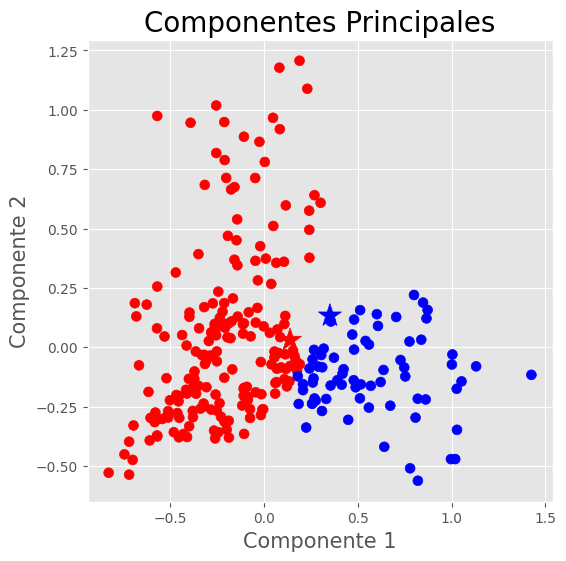

In [20]:
C = kmeans.cluster_centers_
fig = plt.figure(figsize = (6,6)) #Tamaño de la figura
ax = fig.add_subplot(1,1,1) #Crear un grafico dentro de la figura
ax.set_xlabel('Componente 1', fontsize = 15) #Nombre eje X y tamaño de fuente
ax.set_ylabel('Componente 2', fontsize = 15) #Nombre eje Y y tamaño de fuente
ax.set_title('Componentes Principales', fontsize = 20) #Nombre de Titulo y tamaño de fuente
colores=np.array(["Blue", "Red"]) #Arreglo de colores
ax.scatter(x = pca_Data_final.Componente1,  #Scatter es un tipo de grafico de distribución
           y = pca_Data_final.Componente2,
          c = colores[pca_Data_final.Cluster], s=50) #Se le asignan colores a los puntos 
 

plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=300)
plt.show()

In [30]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

pca_pipe = make_pipeline(MinMaxScaler(), PCA(n_components=2))
pca_pipe.fit(dataframefinal)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Se convierte el array a dataframe para añadir nombres a los ejes.
dataframefinal.drop(['Cluster'], axis=1)
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = dataframefinal.columns,
    index   = ['PC1', 'PC2']
)

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5,Cluster
PC1,0.179287,0.091096,0.164526,0.281201,0.191313,0.192441,0.238042,-0.103175,-0.097821,0.010352,-0.137996,-0.169325,-0.167402,-0.184522,0.186055,0.200313,-0.719908
PC2,-0.088790,0.000119,-0.038936,-0.150489,-0.099588,-0.096023,-0.062333,0.466436,0.448067,-0.026132,-0.294168,-0.343137,-0.348127,-0.323677,0.200842,0.203065,0.118789


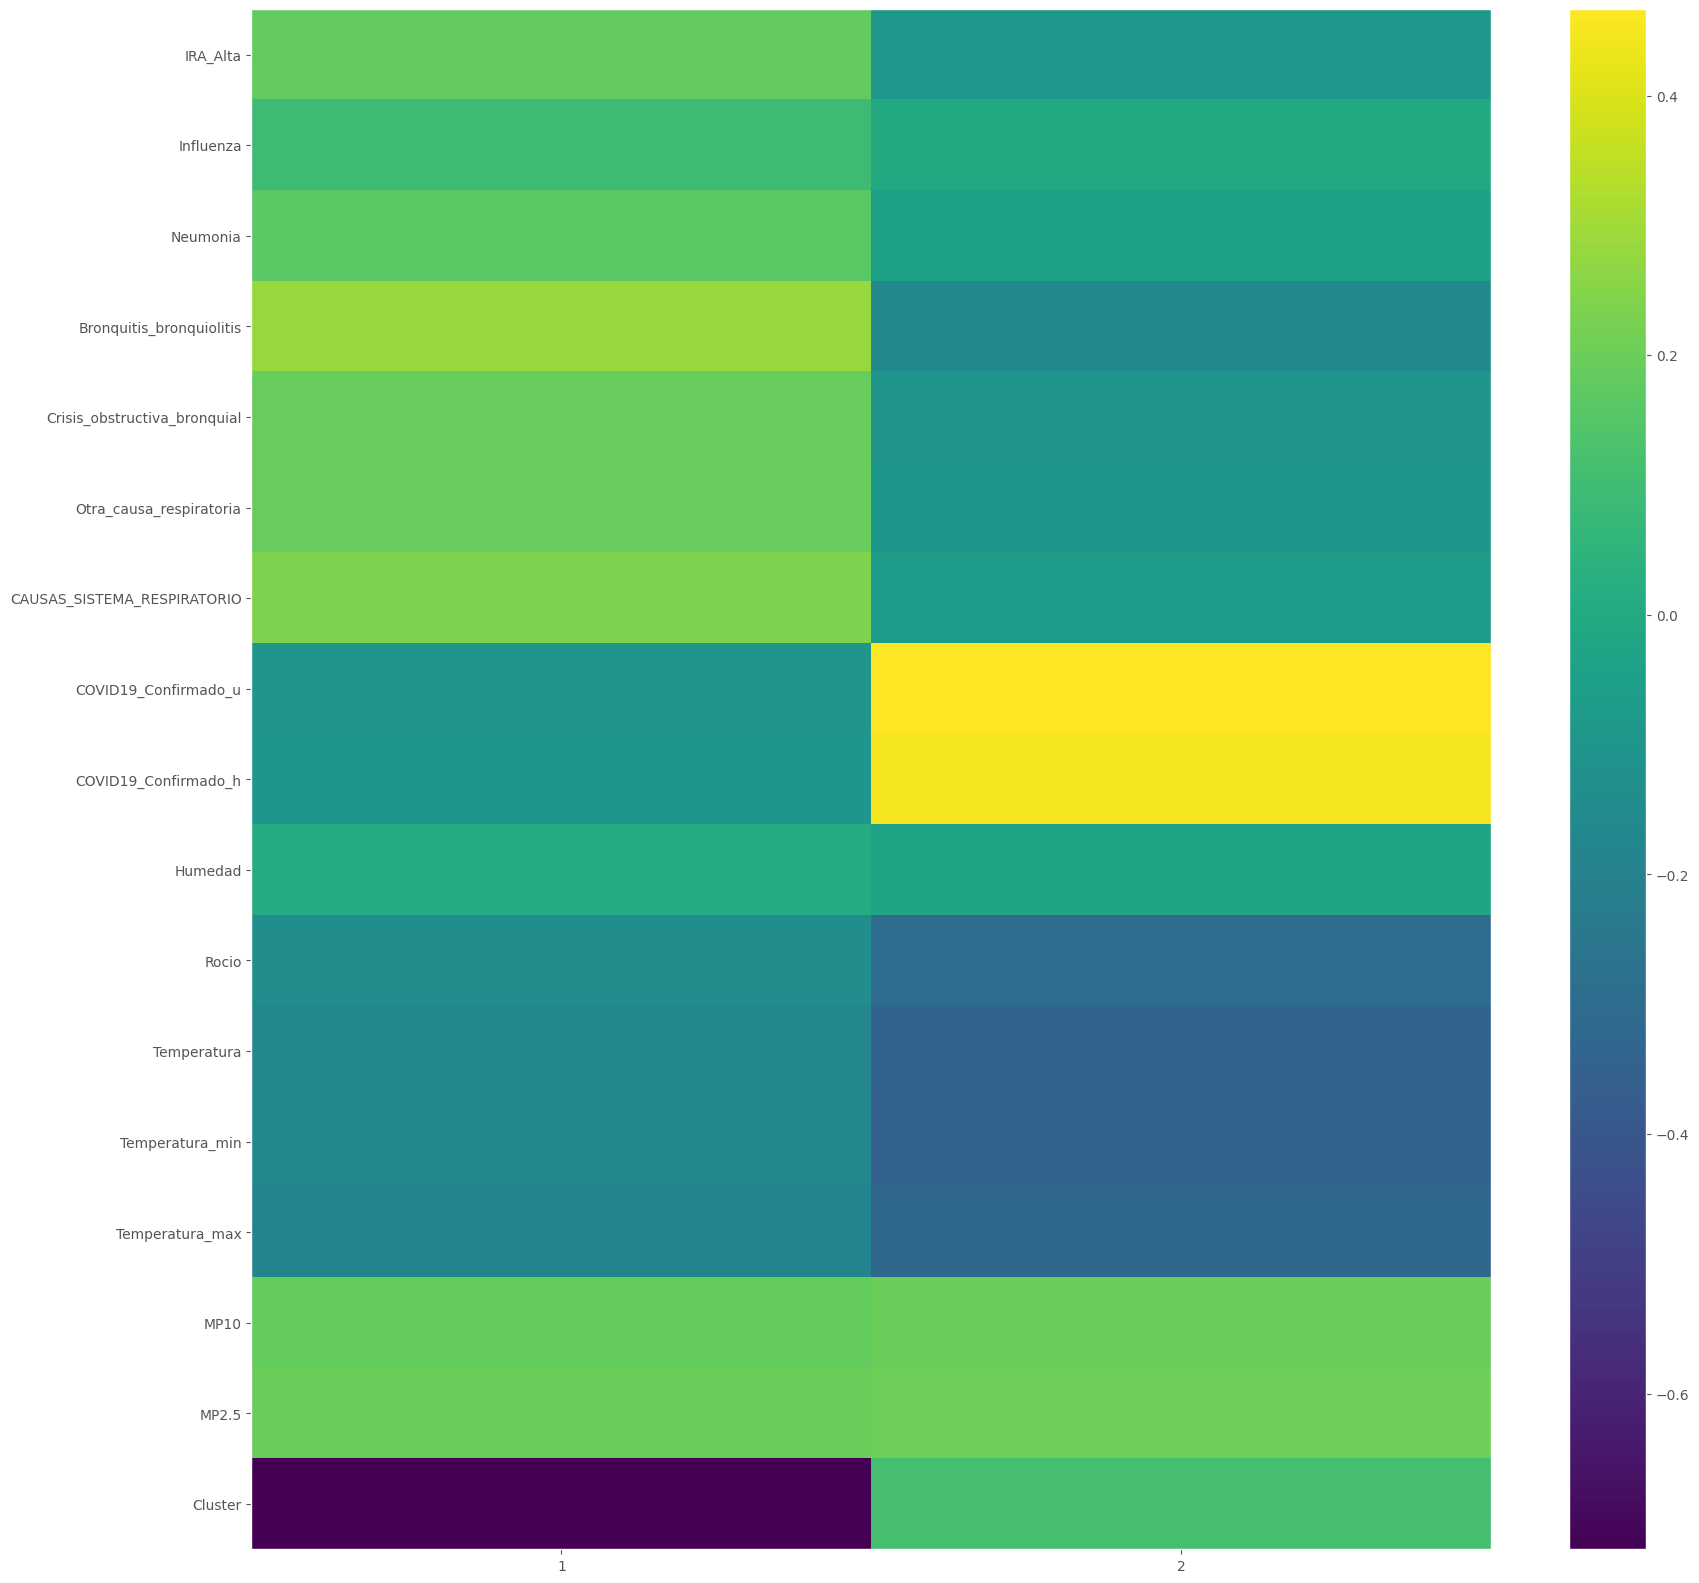

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
plt.xticks(range(2), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[3.98902037e-01 2.08998778e-01 8.69282308e-02 8.08942639e-02
 5.61815187e-02 5.27694432e-02 3.74501583e-02 2.37100662e-02
 1.45262747e-02 1.26748901e-02 1.04800640e-02 7.58000007e-03
 5.64303789e-03 1.64783942e-03 1.37742122e-03 2.35976897e-04]


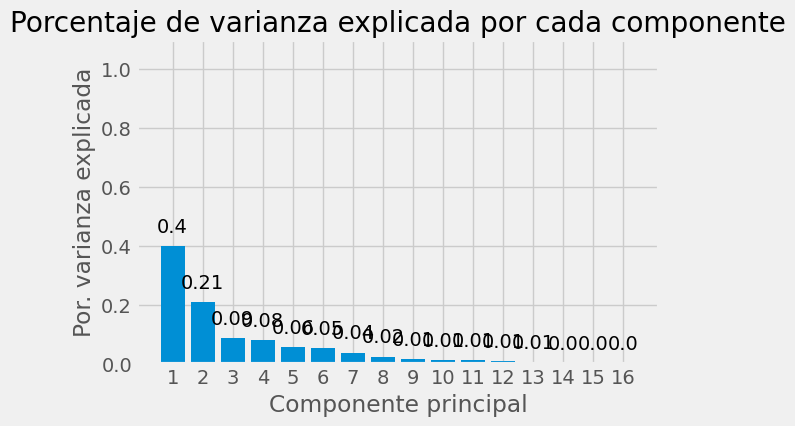

In [26]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)
for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');
plt.show()

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.36398908 0.59611723 0.67974793 0.75549364 0.8080788  0.85544734
 0.89336661 0.92339331 0.94368842 0.95683032 0.96830143 0.97821525
 0.98605251 0.99217265 0.99716109 0.99860906 0.99979305 1.        ]


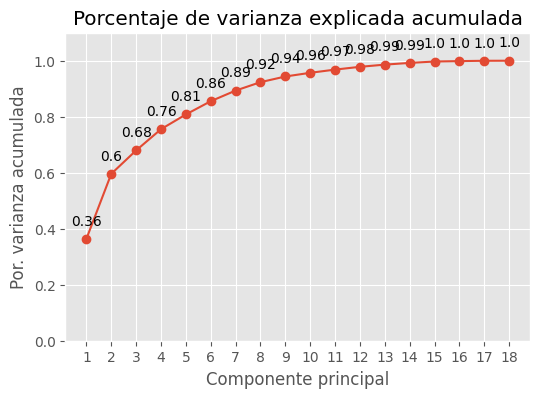

In [6]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(dataframefinal.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');
plt.show()

In [43]:
print(dataframefinal.index)
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=dataframefinal)
proyecciones = pd.DataFrame(
    proyecciones,
    columns =  ['PC1', 'PC2'],
    index   = dataframefinal.index
)
proyecciones.head()

proyecciones = np.dot(modelo_pca.components_, scale(dataframefinal).T) # (dataframefinal).T
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2'])
proyecciones = proyecciones.transpose().set_index(dataframefinal.index)
proyecciones.head()

print(proyecciones.head())

RangeIndex(start=0, stop=258, step=1)
        PC1       PC2
0 -0.489422 -0.988668
1 -1.209341 -1.508619
2 -2.839412 -3.537357
3 -3.335497 -4.043572
4 -1.925427 -2.549022
